In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import spfeas

In [4]:
import mpglue as gl

In [8]:
import numpy as np
import pandas as pd
import matplotlib as mpl
%mpl inline

In [9]:
import skimage

In [10]:
mpl.rcParams['figure.figsize'] = (10, 10)

# Image handling

## Open a picture

In [133]:
# Setup the name of the image you want to open.
image2open = 'data/PIA22841.tif'

# Load a pointer to an image and give it a variable name.
with gl.ropen(image2open) as i_info:
    print(dir(i_info))

['__class__', '__del__', '__delattr__', '__dict__', '__doc__', '__enter__', '__exit__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_as_xarray', '_check_band_list', '_cleanup', '_get_driver_name', '_get_file_format', '_get_hdr_info', '_norm2predictions', '_open_array', '_open_dataset', '_predictions2norm', '_reshape', 'bands', 'block_x', 'block_y', 'bottom', 'build_overviews', 'calculate_stats', 'cellX', 'cellY', 'center_x', 'center_y', 'check_clouds', 'check_corrupted', 'check_corrupted_bands', 'close', 'close_all', 'close_band', 'close_file', 'color_interpretation', 'cols', 'contains', 'contains_value', 'copy', 'datasource', 'datasource_info', 'directory', 'epsg', 'extent', 'file_format', 'file_name', 'file_open', 'filename', 'fill', 'geo_transform', 'get_band', 'get_chunk_size', 'get_image_info', 'get_metadata'

## Getting image information

In [12]:
# Get the name of the directory and file.
with gl.ropen(image2open) as i_info:
    
    print i_info.file_name
    print i_info.filename
    print i_info.rows, i_info.cols
    print i_info.shape
    print i_info.name
    print i_info.left, i_info.right, i_info.top, i_info.bottom
    print i_info.extent

PIA22841.tif
PIA22841.tif
1917 2274
{'row_units': '1,917.00', 'rows': '1,917', 'col_units': '2,274.00', 'bands': 3, 'pixels': '13,077,774', 'columns': '2,274'}
GTiff
0.0 2274.0 0.0 -1917.0
{'top': 0.0, 'right': 2274.0, 'bottom': -1917.0, 'left': 0.0}


#### The image has 3 bands.

## Getting image data

In [13]:
# Load the image as an n-dimensional array (NumPy array).
with gl.ropen(image2open) as i_info:
    image_array = i_info.read()

In [14]:
# Check the shape of the image_array. *It should be the same size as the loaded image, except only one band.
print image_array.shape

(1917, 2274)


## Viewing images

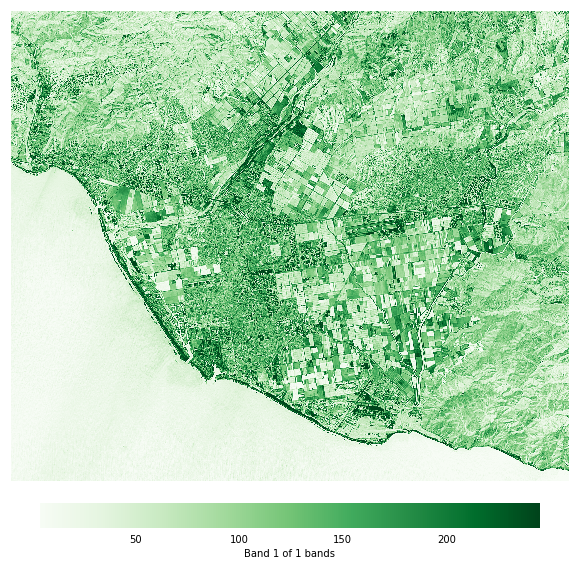

<Figure size 720x720 with 0 Axes>

In [15]:
with gl.ropen(image2open) as i_info:
    i_info.read()
    i_info.show(color_map='Greens')

## View a band in greyscale

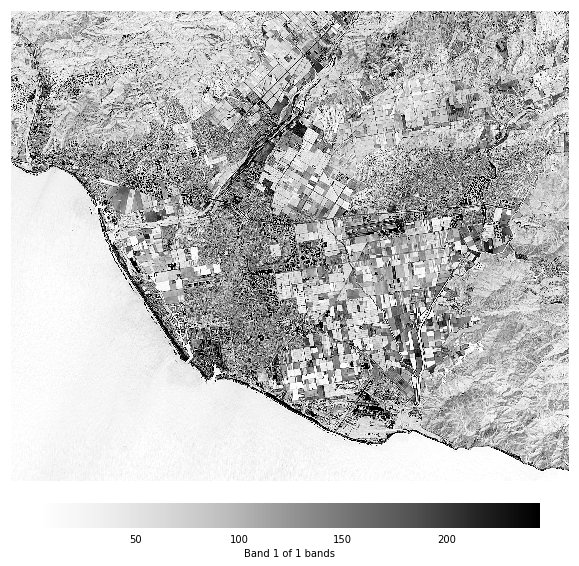

<Figure size 720x720 with 0 Axes>

In [16]:
#View the first band
with gl.ropen(image2open) as i_info:
    i_info.read()
    i_info.show(color_map='Greys', band=1)

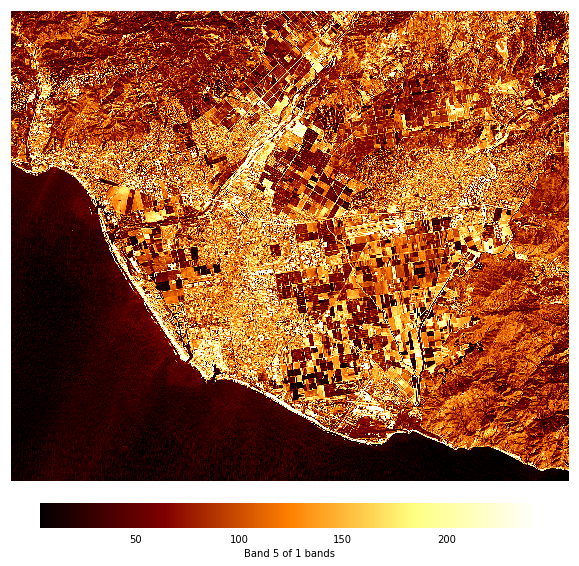

<Figure size 720x720 with 0 Axes>

In [17]:
# Now view the MidIR band.
with gl.ropen(image2open) as i_info:
    image_array = i_info.read(bands2open=1)
    i_info.show(band=5, color_map='afmhot')

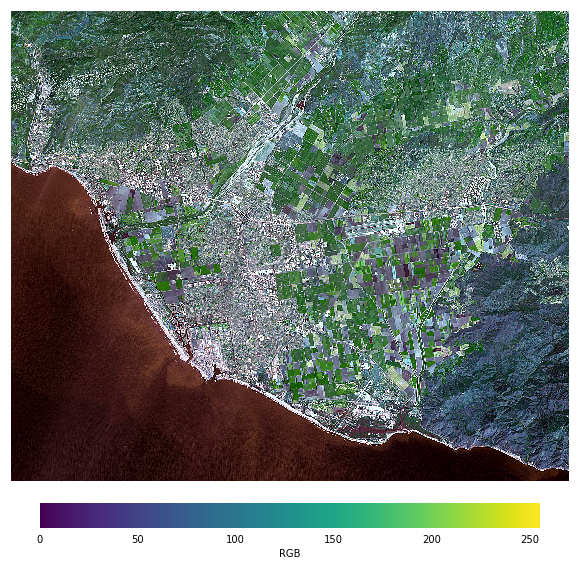

<Figure size 720x720 with 0 Axes>

In [18]:
# Load the three visible bands and
#   view the true color plot.
# !Warning! 16-bit arrays are scaled to byte
#   when displaying RGB images.
with gl.ropen(image2open) as i_info:
    
    image_array = i_info.read(bands2open=[3, 2, 1],
                              sort_bands2open=False)
    
    i_info.show(band='rgb', clip_percentiles=(2, 98))

# Landcover modeling

* Utilize the classification inferface for handling land cover samples, training classification and regression models, and predicting land cover on satellie imagery.

In [19]:
CL = gl.classification()
print dir(CL)

['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_centroid_histogram', '_create_grid_strata', '_create_group_strata', '_create_indices', '_default_parameters', '_get_additional_layers', '_get_feas', '_get_slope', '_index_samples', '_load_model', '_mask_background', '_num_rows_cols', '_plot_colors', '_predict', '_predict4crf', '_predict4orf', '_recode_all', '_recode_labels', '_remove_classes', '_remove_min_observations', '_remove_outliers', '_sample_group', '_scale_p_vars', '_set_bands2open', '_set_indexing', '_set_model', '_set_n_blocks', '_set_output_object', '_set_parameters', '_stack_samples', '_stratify', '_train_model', '_transform4crf', 'add_variable_names', 'compare_features', 'compare_samples', 'construct_model', 'copy', 'dump', 'extract_endmembers', 'get_abundance', 'get_clas

In [20]:
samples = 'data/08N_points_merged.txt'

In [21]:
# Load the samples
CL.split_samples(samples)

print dir(CL)

['XY', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_centroid_histogram', '_create_grid_strata', '_create_group_strata', '_create_indices', '_default_parameters', '_get_additional_layers', '_get_feas', '_get_slope', '_index_samples', '_load_model', '_mask_background', '_num_rows_cols', '_plot_colors', '_predict', '_predict4crf', '_predict4orf', '_recode_all', '_recode_labels', '_remove_classes', '_remove_min_observations', '_remove_outliers', '_sample_group', '_scale_p_vars', '_set_bands2open', '_set_indexing', '_set_model', '_set_n_blocks', '_set_output_object', '_set_parameters', '_stack_samples', '_stratify', '_train_model', '_transform4crf', 'add_variable_names', 'all_samps', 'class_counts', 'class_idx', 'class_subs', 'classes', 'classes2remove', 'clear_idx', 'compare_features'

## The sample txt file

In [22]:
from IPython.display import Image

![title](data/08N_01.png)

![title](data/08N_02.png)

In [23]:
# the x, y coordinates
print CL.XY

[[-330385.78125   113423.414062]
 [-330385.78125   113423.414062]
 [-330385.78125   113423.414062]
 ...
 [-294261.75     -191333.578125]
 [-294261.75     -191333.578125]
 [-294261.75     -191333.578125]]


In [24]:
# the unique land cover classes
print CL.classes

[1, 2, 3, 4, 5, 6]


In [25]:
# the class label vector
print CL.labels

[1 1 3 ... 1 1 1]


In [26]:
# the number of land cover samples per class
print CL.class_counts

{1: 1170, 2: 1060, 3: 163, 4: 113, 5: 98, 6: 55}


In [27]:
# the image variables
print CL.p_vars

[[129.     184.     163.     ... 196.       2.9463  27.    ]
 [131.     184.     163.     ... 195.       1.6667  27.    ]
 [147.     170.     158.     ... 179.       1.6667  26.    ]
 ...
 [134.     160.     152.     ...  71.       3.7731  29.    ]
 [134.     159.     152.     ...  71.       3.3333  29.    ]
 [133.     156.     145.     ...  69.       4.1667  29.    ]]


In [28]:
print 'Image variables shape: ', CL.p_vars.shape
print 'Number of image variables: ', CL.n_feas
print 'Number of class label samples: ', len(CL.labels)
print 'Class counts: ', CL.class_counts

Image variables shape:  (2659, 41)
Number of image variables:  41
Number of class label samples:  2659
Class counts:  {1: 1170, 2: 1060, 3: 163, 4: 113, 5: 98, 6: 55}


## Visualizing data

#### Showing 2 variables

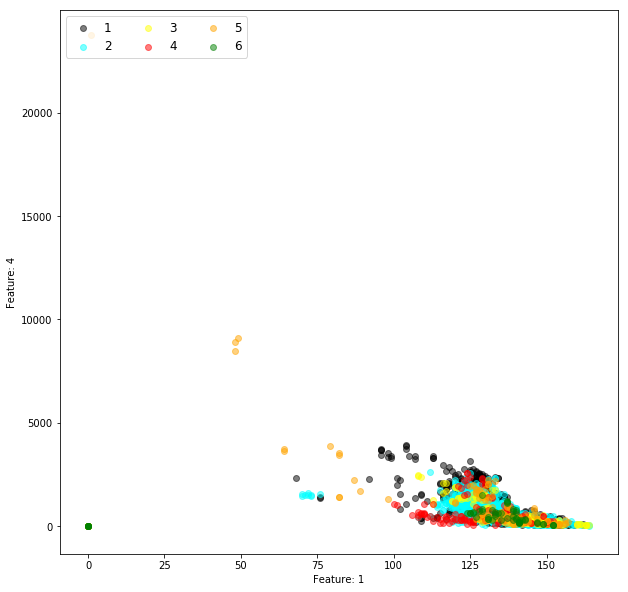

In [29]:
CL.vis_data(1, 4)

#### Showing 3 variables

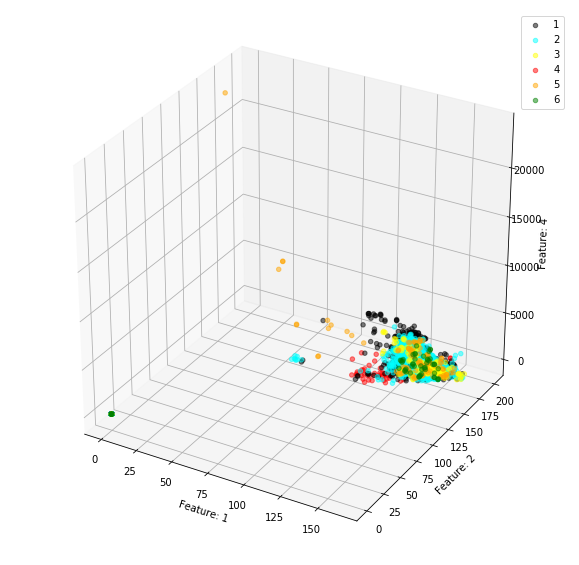

In [30]:
CL.vis_data(1, 2, fea_3=4)

## Ranking and optimizing

In [31]:
# Rank the explanatory variables with a chi-square test
CL.rank_feas(rank_method='chi2', top_feas=0.2)

21:43:56:INFO:6835:classification.rank_feas:**********************
*                    *
* Chi^2 Feature Rank *
*                    *
**********************

Rank      Variable      Value
----      --------      -----
21:43:56:INFO:6862:classification.rank_feas:1         37            12719948.858745825
21:43:56:INFO:6862:classification.rank_feas:2         38            8048368.660612066
21:43:56:INFO:6862:classification.rank_feas:3         32            300194.0085165854
21:43:56:INFO:6862:classification.rank_feas:4         11            221429.59419911148
21:43:56:INFO:6862:classification.rank_feas:5         25            120694.96661003753
21:43:56:INFO:6862:classification.rank_feas:6         4             105479.73410844216
21:43:56:INFO:6862:classification.rank_feas:7         18            94064.96732670418
21:43:56:INFO:6862:classification.rank_feas:8         39            36449.34378129974
21:43:56:INFO:6879:classification.rank_feas:  Mean score:  2705828.77
21:43:56:INFO:6881

### The target variable strongly depends on variable #37, #38, #32, #11 

In [32]:
# Rank the explanatory variables with a Random Forest 
#   model and compare results.

# First, construct a Random Forest model.
CL.construct_model(classifier_info={'classifier': 'RF'})

21:44:04:INFO:5005:classification._train_model:  Training a RF model with 2,659 samples and 41 variables ...


In [33]:
# Use the RF model to rank feature importance.
CL.rank_feas(rank_method='RF', top_feas=.2)

21:44:10:INFO:6835:classification.rank_feas:************************************
*                                  *
* Random Forest Feature Importance *
*                                  *
************************************

Rank      Variable      Value
----      --------      -----
21:44:10:INFO:6862:classification.rank_feas:1         37            0.09743748048905981
21:44:10:INFO:6862:classification.rank_feas:2         39            0.07067823600936234
21:44:10:INFO:6862:classification.rank_feas:3         38            0.06918040849672479
21:44:10:INFO:6862:classification.rank_feas:4         25            0.03350510391740281
21:44:10:INFO:6862:classification.rank_feas:5         28            0.028563396918044506
21:44:10:INFO:6862:classification.rank_feas:6         36            0.02805682860140268
21:44:10:INFO:6862:classification.rank_feas:7         20            0.026616725991873386
21:44:10:INFO:6862:classification.rank_feas:8         18            0.02531099813463991
21:4

## Optimizing parameters

# I debugged the classification.py file by adding the following lines: 
    from sklearn import svm
    SVC = svm.SVC
    

In [51]:
# Construct a Random Forest model with 100 trees.
CL.construct_model(classifier_info={'classifier': 'RF'})

# The model is stored in `model`.
print(CL.model)

21:59:51:INFO:5005:classification._train_model:  Training a RF model with 2,659 samples and 41 variables ...


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


## Testing

### Build an error matrix

In [121]:
emat = gl.error_matrix()

In [122]:
import numpy as np

# Due to the lack of labeled data, I create some random data as the 
#predicted and observed value to demonstrate the function
test_array = np.random.randn(100, 2).astype('uint8')

emat.get_stats(po_array=test_array)

In [123]:
emat.get_stats(po_array=test_array)

In [124]:
print(dir(emat))

['X', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'accuracy', 'class_list', 'discrete', 'e_matrix', 'error_matrix2xy', 'f_beta', 'f_scores', 'get_stats', 'hamming', 'kappa', 'kappa_score', 'merge_lists', 'n_classes', 'n_samples', 'n_samps', 'producers', 'producers_accuracy', 'report', 'sample_bias', 'time_stamp', 'users', 'users_accuracy', 'write_stats', 'y']


In [125]:
print(emat.accuracy)

53.0


### The accuracy is 53%.

In [126]:
print(emat.e_matrix)

[[50 10  2  1  3  7]
 [13  2  0  0  0  1]
 [ 0  0  1  0  0  0]
 [ 0  0  0  0  0  0]
 [ 2  0  0  0  0  1]
 [ 7  0  0  0  0  0]]


In [127]:
print(emat.kappa_score)

-0.049810140719231955


In [128]:
print(emat.report)

              precision    recall  f1-score   support

           0       0.68      0.69      0.69        72
           1       0.12      0.17      0.14        12
           2       1.00      0.33      0.50         3
         253       0.00      0.00      0.00         1
         254       0.00      0.00      0.00         3
         255       0.00      0.00      0.00         9

   micro avg       0.53      0.53      0.53       100
   macro avg       0.30      0.20      0.22       100
weighted avg       0.54      0.53      0.53       100



### Besides random forest, there are other machine learning methods can be untilized in the mpglue package. For classification problems, there are AdaBoost with CART, extremely random trees, Bagged Decision Trees,Downsampled bagging, Naives Bayes, CatBoost for Gradient Boosting, Support Vector Machine, Logistic Regression, K Nearest Neighbor, Quadratic Discriminant Analysis, Tpot pipeline and XGBoost.

# Mpglue can also make predictions on an image.

In [ ]:
# Apply the model to an image.
CL.predict('input_image.tif',
           'output_image.tif')